# Regressão Linear - Implementação Prática

In [ ]:
# Bibliotecas Necessárias
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

Link do conjunto de dados:

DATASET: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression?resource=download

In [ ]:
# Lendo o dataset
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### Apresentação do dataset


**Descrição**

O Conjunto de Dados de Desempenho dos Estudantes é um conjunto de dados projetado para examinar os fatores que influenciam o desempenho acadêmico dos estudantes. O conjunto de dados consiste em 10.000 registros de estudantes, em que cada registro contém informações sobre vários preditores e um índice de desempenho.

Variáveis:
- **Horas Estudadas**: O número total de horas dedicadas aos estudos por cada estudante.
- **Notas Anteriores**: As notas obtidas pelos estudantes em testes anteriores.
- **Atividades Extracurriculares**: Se o estudante participa de atividades extracurriculares (Sim ou Não).
- **Horas de Sono**: O número médio de horas de sono que o estudante teve por dia.
- **Simulados de Questões Praticados**: O número de simulados de questões que o estudante praticou.

Variável-Alvo:
- **Índice de Desempenho**: Uma medida do desempenho global de cada estudante. O índice de desempenho representa o desempenho acadêmico do estudante e foi arredondado para o inteiro mais próximo. O índice varia de 10 a 100, sendo valores mais altos indicativos de um melhor desempenho.

In [ ]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
df.shape

(10000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
# Algumas informações estatísticas sobre os atributos numéricos
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
# Tipo de dados presentes no dataset
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [ ]:
# Quantidade de cada tipo de dado
df.dtypes.value_counts()

int64      4
object     1
float64    1
dtype: int64

**Box plot de Hours Studied, Sleep Hours e Sample Question Papers Practiced**

Foi feita esta divisão pois o atributo 'Previous Scores' tem uma escala muito maior e desta maneira, nosso gráfico ficaria deformado.

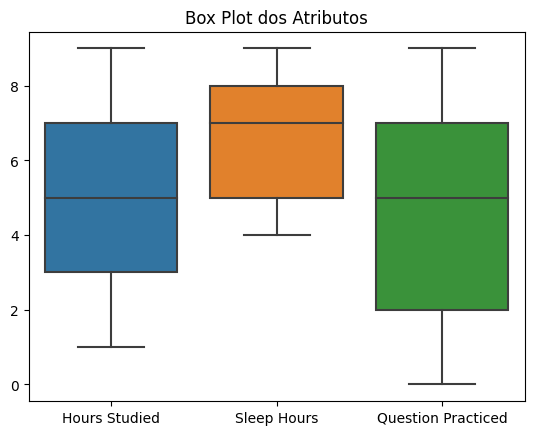

In [ ]:
sns.boxplot(data=df[['Hours Studied', 'Sleep Hours', 'Sample Question Papers Practiced']])
plt.title('Box Plot dos Atributos')
plt.xticks([0,1,2], ['Hours Studied','Sleep Hours','Question Practiced']) # Nome caber na imagem
plt.show()

Neste gráfico podemos analisar a distribuição dos atributos 'Hours Studied', 'Sleep Hours' e 'Question Parcticed', em que seu respectivos quartis e médias são exibidos. Podemos observar que não apresentam outliers e que por exemplo o número de horas mínimas de estudo apresentadas é de 1h, a média de horas de sono está entre 6h e 8h, e o máximo de questões praticadas foi acima de 8.

**Box plot de Previous Scores e Perforce Index**

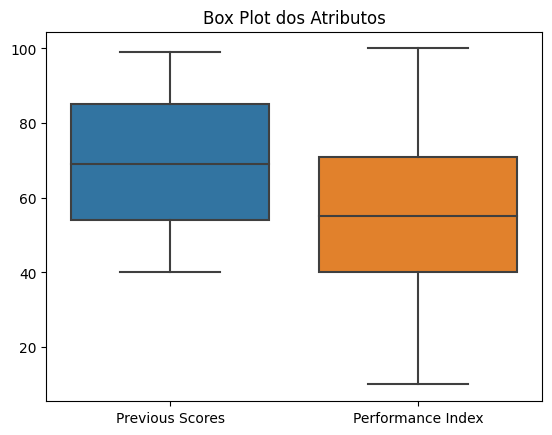

In [ ]:
sns.boxplot(data=df[['Previous Scores', 'Performance Index']])
plt.title('Box Plot dos Atributos')
plt.show()

Analogamente segue-se também o boxplot dos demais atributos numéricos, 'Previous Scores' e 'Performance Index'. Em que podemos analisar que a média de notas da performance foi menor do que a média das notas anteriores. Bem como observado nos dados no geral, em que os presentes entre o segundo e terceiro quartil, que representam 75% dos dados, também estão com valores abaixo.

**Atividades Extracurriculares**

In [ ]:

valores_sim = (df['Extracurricular Activities'] == 'Yes').sum()
valores_nao = (df['Extracurricular Activities'] == 'No').sum()


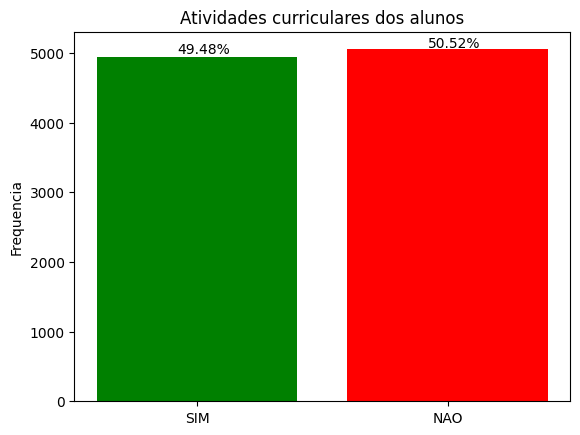

In [ ]:
 # create a dataset
height = [valores_sim,valores_nao]
bars = ('SIM', 'NAO')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['green','red'])

# Create names on the x-axis
plt.xticks(x_pos, bars)
plt.text(-0.08,5000,f"{(valores_sim/len(df) * 100):.2f}%")
plt.text(0.92,5080,f"{(valores_nao/len(df) * 100):.2f}%")

plt.title("Atividades extra-curriculares dos alunos")

plt.ylabel("Frequencia")

# Show grap
plt.show()

### Pré-Processamento

Nesta seção iremos realizar o pré-processamento do dataset para deixá-lo pronto para que possamos aplicar nosso modelo de regressão sem nenhum tipo de problema:

Para isso iremos:

1. Tratar valores faltantes
2. Corrigir tipos de atributos
3. Mapear valores binários para 0/1
4. Verificar atributos ambíguos (correlação)
5. Normalização do conjunto de dados



OBS: Antes de normalizamos o conjunto de dados, já iremos fazer a divisão entre treino e teste para evitar qualquer problema relacionado a "data leakage". Embora nesta aplicação isto não aconteça tanto, em cenários reais, isto pode ser um grave problema que impacta o modelo gerado de alguma forma.

**Verificar se há valores faltantes**

In [ ]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

**Veririficar os tipos das colunas**

In [ ]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

**Transformando a coluna "Extracurricular Activities" em binária**


In [ ]:
df['Extracurricular Activities'] =  df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

#### Matriz de Correlação com standard

Verificando os atributos se temos atributos ambíguos

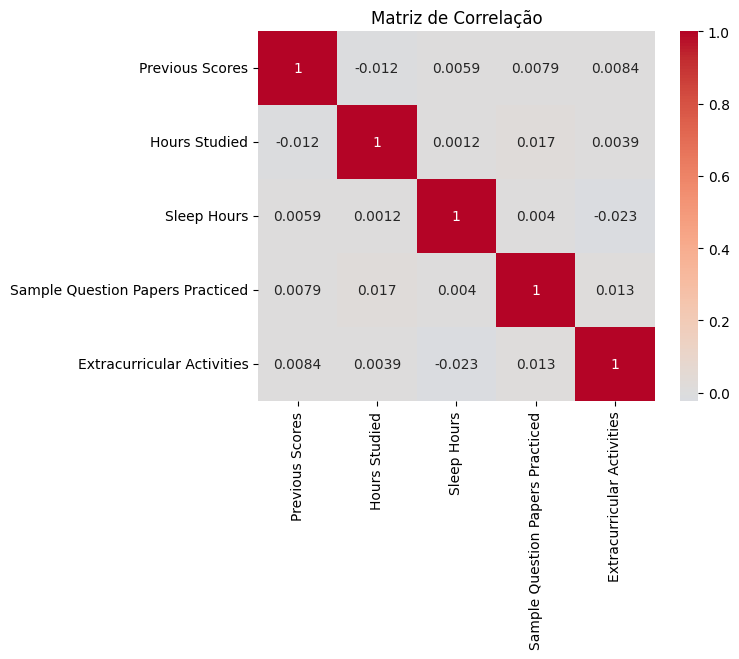

In [ ]:
# Verificando se temos atributos ambíguos
colunas = ['Previous Scores', 'Hours Studied', 'Sleep Hours', 'Sample Question Papers Practiced','Extracurricular Activities']
sns.heatmap(df[colunas].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

#### Metodo dos Mínimos Quadrados

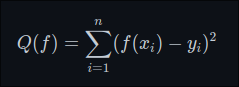

- $Q(f)$ avalia o quadrado da diferença entre o valor experimental $y_{i}$ e o
valor de $f$ em $x$
-  Elevar essas diferenças ao quadrado para que todas as parcelas avaliadas no somatório sejam positivas
- Resulta em uma soma de distâncias entre os valores experimentais e os valors assumidos por $f$ nos pontos experimentais.

#### Verificando Linearidade

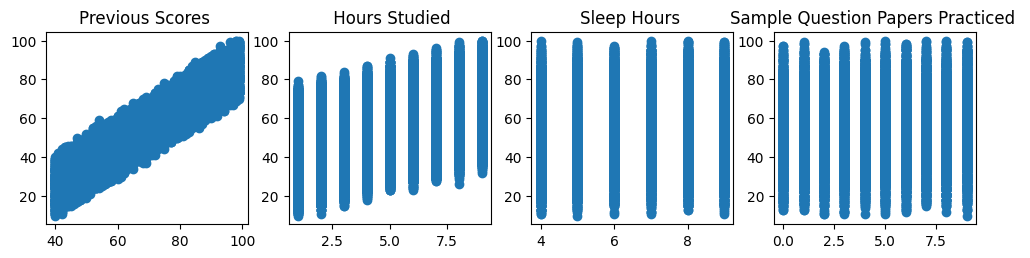

In [ ]:
# Vamos verificar a linearidade individual de cada atribut com a nossa variável resposta

fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(12,2.5))

ax1.scatter(df['Previous Scores'] , df['Performance Index'])
ax1.set_title("Previous Scores ")

ax2.scatter(df['Hours Studied'] , df['Performance Index'])
ax2.set_title(" Hours Studied")

ax3.scatter(df['Sleep Hours'] , df['Performance Index'])
ax3.set_title("Sleep Hours ")

ax4.scatter(df['Sample Question Papers Practiced'] , df['Performance Index'])
ax4.set_title("Sample Question Papers Practiced ")

plt.show()


#### Separando o dataset em 70/30
- 70% será treino
- 30% será teste


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], train_size=0.7) # Retorno da função são 4 arrays, pois devemos dividir entre target e não target previamente
print("tamanho dataset de treino = ", X_train.shape[0])
print("tamanho dataset de test = ", X_test.shape[0])

tamanho dataset de treino =  7000
tamanho dataset de test =  3000


#### Normalizar usando Standard Scaler

In [ ]:
# Normalizando o treino para predição
scaler = StandardScaler()
colunas = ['Previous Scores', 'Hours Studied', 'Sleep Hours', 'Sample Question Papers Practiced'] # Não precisa normalizar o target

X_train[colunas] = scaler.fit_transform(X_train[colunas])
X_train.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
2483,1.549858,-0.672672,0,0.269497,0.153821
6004,1.162698,-1.193041,1,0.859205,0.153821
224,-1.547425,0.194610,0,-0.320212,-1.593580
4831,-0.773104,-1.193041,0,-1.499628,0.852782
994,0.775538,-0.557034,1,1.448914,-0.545139


In [ ]:
# Normalizando o teste para a predição
scaler = StandardScaler() # Media 0 e Desvio Padrão 1
colunas = ['Previous Scores', 'Hours Studied', 'Sleep Hours', 'Sample Question Papers Practiced'] # Não precisa normalizar o target

X_test[colunas] = scaler.fit_transform(X_test[colunas])
X_test.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
77,-0.761856,-0.860277,1,-0.885686,-1.610427
8195,0.390338,-0.229659,0,-0.885686,-1.610427
7740,1.158467,0.687602,0,-1.475489,0.125695
8480,-1.145921,0.114314,0,0.293918,0.820144
214,0.774402,0.802260,1,-0.885686,0.472920


In [ ]:
# Normalizando o conjunto em geral para a inferência
df_inference = df.copy()
scaler = StandardScaler() # Media 0 e Desvio Padrão 1
colunas = ['Previous Scores', 'Hours Studied', 'Sleep Hours', 'Sample Question Papers Practiced'] # Não precisa normalizar o target
df_inference[colunas] = scaler.fit_transform(df_inference[colunas])
df_inference.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1,1.456205,-1.249754,91.0
1,-0.383481,0.723913,0,-1.492294,-0.900982,65.0
2,1.161410,-1.063626,1,0.276805,-0.900982,45.0
3,0.002742,-1.005963,1,-0.902594,-0.900982,36.0
4,0.775188,0.320275,0,0.866505,0.145333,66.0


### Predição

Aplicando a Regressão Linear para a predição

In [ ]:
# Importando o modelo e as métricas
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
# Criando objeto do modelo
lr = LinearRegression()

# Treina
lr.fit(X_train, y_train)

# Predições
pred = lr.predict(X_test)

# Calculando métricas
r2 = r2_score(pred, y_test)
mse = mean_squared_error(pred, y_test)
mape = mean_absolute_percentage_error(pred, y_test)

# Coeficientes
coef = lr.coef_
print(f'Coeficientes: {coef}')
print(f"B0 = {lr.intercept_}")

print(f'\nMSE: {mse:.4f}')
print(f'R2: {r2:.4f}')
print(f'MAPE: {mape:.4f}')

Coeficientes: [ 7.36583269 17.61231645  0.60425942  0.79215482  0.55894449]
B0 = 55.14333473481211

MSE: 4.6243
R2: 0.9874
MAPE: 0.0367


EXPLICAR MÉTRICAS

Para medirmos a eficiência do nosso modelo e o quão bem ele se ajusta aos dados, utilizamos 3 métricas:
1. Mean Squared Error (MSE)
2. R-Squared (R2)
3. Mean Absolute Percentage Error (MAPE)

1. **Mean Squared Error (MSE)**

O Mean Squared Error (Erro quadrático médio) é uma medida que avalia o quão próximo as previsões de um modelo estão dos valores reais, calculando a média dos quadrados das diferenças entre eles. Quanto menor o MSE, melhor o ajuste do modelo aos dados. Varia de 0 ao infinito.

É dado pela fórmula:

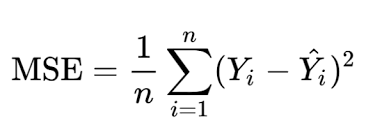


2. **R²**

O R² (R2, R-Squared) mede o quanto um modelo de regressão se ajusta aos dados. Varia de 0 a 1, em que 0 indica um ajuste fraco e 1 um ajuste forte.

É dado pela fórmula:

![image](https://miro.medium.com/v2/resize:fit:1400/1*_HbrAW-tMRBli6ASD5Bttw.png)

3. **Mean Percentage Absolute Error (MAPE)**

O Erro Percentual Absoluto Médio  é uma métrica que mede a precisão das previsões de um modelo em termos percentuais, calculando a média das diferenças percentuais absolutas entre previsões e valores reais. Quanto menor o MAPE, melhor a precisão das previsões. Ou seja, varia de 0 ao infinito.

É dado pela fórmula:

![image](https://miro.medium.com/v2/resize:fit:726/1*Txq63FvjzmdK-sDeCCDx1A.png)

**Validação-cruzada (K-Fold)**


O K-fold é uma técnica de validação do nosso modelo que é bastante utilizada para tentar encontrar parâmetros ideais, ou também para validar o modelo, ou seja, para garantir que ele este generalizando as entradas corretamente, se nenhum tipo de overfitting.

Esta técnica consiste em pegar os dados de treino e dividi-los em K folds (que seriam partições do conjunto de dados).

EX:
NOSSO CONJUNTO TEM 10.000 AMOSTRAS. -> 7.000 de treino

Assim, dividimos nosso conjunto de treino em 10 folds, cada fold terá 700 objetos.

Em seguida, iremos rodar a validação k vezes, tal que dos k fold, k-1 serão utilizados para treino e 1 será utilizado para teste/validação do nosso modelo. Nota-se que todos os folds serão utilizados para treino e para teste, já que faremos k iterações.

Desta maneira, podemos avaliar as métricas com ângulos diferentes e conjuntos de treino diferentes também, para visualizarmos se temos overfitting.

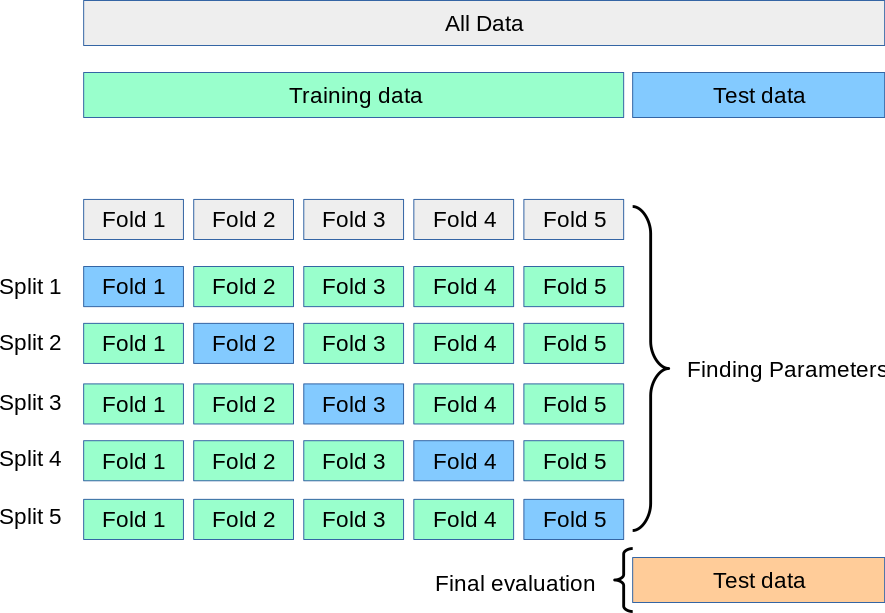

In [ ]:
from sklearn.model_selection import KFold

# K = 10
kf = KFold(n_splits=10, shuffle=True)

scores = []

for train, val in kf.split(X_train):
    x_train, x_val = X_train.iloc[train], X_train.iloc[val]
    Y_train, y_val = y_train.iloc[train], y_train.iloc[val]

    lr = LinearRegression()

    # Treina
    lr.fit(x_train, Y_train)

    # Predições
    pred = lr.predict(x_val)

    # Calculando métricas
    r2 = r2_score(y_val, pred)
    mse = mean_squared_error(y_val, pred)
    mape = mean_absolute_percentage_error(y_val, pred)

    scores.append((r2, mse, mape))

# Mostrando cada métricas por fold
for i, (r2, mse, mape) in enumerate(scores):
    print(f"Fold {i+1} - R2: {r2:.4f} MSE: {mse:.4f} MAPE: {mape:.4f}")

# Calculando a média dos R2s
print(f"\nMédia R2: {np.mean([r2 for r2, _, _ in scores]):.4f}")

# Calculando a média dos MSEs
print(f"Média MSE: {np.mean([mse for _, mse, _ in scores]):.4f}")

# Calculando a média dos MAPEs
print(f"Média MAPE: {np.mean([mape for _, _, mape in scores]):.4f}")

Fold 1 - R2: 0.9891 MSE: 3.8551 MAPE: 0.0316
Fold 2 - R2: 0.9881 MSE: 4.3752 MAPE: 0.0364
Fold 3 - R2: 0.9886 MSE: 4.0437 MAPE: 0.0336
Fold 4 - R2: 0.9881 MSE: 4.3422 MAPE: 0.0348
Fold 5 - R2: 0.9870 MSE: 4.5318 MAPE: 0.0340
Fold 6 - R2: 0.9873 MSE: 4.2149 MAPE: 0.0349
Fold 7 - R2: 0.9887 MSE: 4.3555 MAPE: 0.0355
Fold 8 - R2: 0.9897 MSE: 4.0092 MAPE: 0.0351
Fold 9 - R2: 0.9891 MSE: 3.9613 MAPE: 0.0339
Fold 10 - R2: 0.9889 MSE: 4.2679 MAPE: 0.0350

Média R2: 0.9885
Média MSE: 4.1957
Média MAPE: 0.0345


### Inferencia

Fazer a estimação da reta

In [ ]:
X = df_inference.iloc[:,:-1]
X.shape

(10000, 5)

In [ ]:
y = df_inference.iloc[:,-1]
y.shape

(10000,)

Nesta seção iremos realizar a tarefa de inferência com o nosso conjunto para que seja possível entender se nossas variáveis independentes conseguem descrever linearmente o nosso alvo (variável dependente)

In [ ]:
# Estima a reta para realizar o processo de inferência.
regr = LinearRegression().fit(X,y)

**Coeficientes**

Após estimarmos a reta de regressão iremos verificar os coeficientes de cada atributo para podermos entender como cada um influencia na variável dependente

In [ ]:
# Visualizando os coeficientes angulares (B1,B2,...)
regr.coef_

array([ 7.38688215, 17.66197609,  0.61289758,  0.81492275,  0.55567035])

In [ ]:
# Visualizando o intercept (B0)
regr.intercept_

54.92153827644614

A nossa equação tem o seguinte formato:

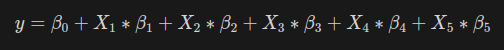

Desta maneira, a equação da nossa reta de regressão seria a seguinte:

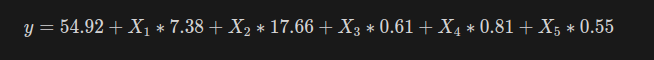

β_0 = Intercept da reta

β_1 = Houras estudadas

β_2 = Nota anterior

β_3 = Atividades Extracurricular

β_4 = Horas dormidas

β_5 = Questões feitas durante os estudos

A regressão multipla é um pouco mais complicada de entender que a regressão simples já que temos mais de um atributo.

Assim, para podemos entender é interessante visualizar alguns possíveis cenários:

OBS: As notas vão de 0 à 100.

Como β_0 é igual a 54.92, podemos entender que a média amostral das notas é em torno deste valor, que seria caso, todos os atributos independentes fosse igual à 0.

Como o conjutno de dados está normalizado, fica um pouco mais complexo de analisar realmente estes valores, mas podemos entender que:

Os coeficientes β_1 e β_2 são os maiores, possuindo maior impacto na nossa variável resposta, ou seja, se aumentarmos uma unidade em "Horas Estudada", então a nossa nota tende a aumentar em 7 pontos.

Entretanto, se diminuirmos 0.75 unidades na nota anterior do aluno, a tendência é que a sua nota na prova final seja 13 pontos menor.


Logo, com os coeficiente da regressão podemos começar a realizar inferências sobre o valor esperado e como cada atributo específico influência o nosso alvo

**Testes de hipóteses**

Após verificarmos os coeficientes da reta e entendê-los, iremos realizar os testes de hipótese para verificar a validade dos coeficientes da reta.

Para isso iremos utilizar o **Teste-F** e o **Teste-Z**

#### Explicação de cada Teste (Opcional)

**Teste F:** Este teste irá avaliar se existe algum coeficiente da nossa reta que consegue descrever linearmente a relação entre uma variável independente com a nossa variável dependente (target). Este teste, utiliza como referência a distribuição F de Fisher-Snedecor. Este teste é relacionado com todos os coeficientes e caso a hipótese alternativa seja aceitada então significa que pelo menos um coeficiente é diferente de 0 (zero)

**Teste Z:** Este teste é individual para cada coeficiente da nossa reta, e ele com ele podemos entender qual/quais coeficientes podem ser validados na nossa reta, tudo isso dependendo do nosso p-valor. Este teste de hipótese utiliza a distribuição normal. Se aceitarmos a hipótese alternativa para um determinado coeficiente ele seria diferente de zero e desta forma podemos encontrar os coeficientes que devem ser utilizados na inferência.

Para entendermos os resultados deste teste, podemos simplesmente compreender que: Se o nosso valor da probabilidade for menor que um nível de significância específico (10%, 5%, 1%) iremos aceitar a hipótese.

Agora iremos para os testes, e para isso precisaremos utilizar uma nova biblioteca, visto que o sklean não aborda esta parte.

#### Prática

Como podemos visualizar abaixo:

Como P(F) < 0.01, recusamos a hipótese NULA, de que TODOS os coeficientes são iguais à zero para um nível de signifância de 1%.

Além disso, como para todos os coeficientes P(t) < 0.01 também recusamos a hipótese NULA de que um coeficiente específico é igual à zero para um nível de significância de 1%.

In [ ]:
# Utilizaremos o método dos quadrados mínimos
modelo = sm.OLS(y, sm.add_constant(X)).fit(use_t=False) # Teste-Z Bicaudal é realizado

print(modelo.summary(alpha=0.01))

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:54:38   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.005      0.995]
----------------------------------------------------------------------------------------------------
const   

#### Explicação da Tabela

Primeiramente, OLS se refere ao método utilizado para encontrar os estimadores: Método dos quadrados mínimos.

**Dep Variable:** Representa qual a nossa variável dependente, neste caso é Y, é importante ressaltar que este nome é derivado do nome da variável que foi passado na instanciação do objeto.

**No. Observations:** Número de amostras no conjunto de dados

**Df Residual:** Grau de liberado do nosso teste de hipóteses realizado, como no nosso caso estamos lidando com duas variáveis será n-2. É importante ressaltar que caso tivessemos 4 atributos independente, o grau de liberadade seira n - 1 - 4.


**Df Model:** Número de variáveis que serão utilizadas para predizer Y, neste caso apenas uma.

**Covariance Type:** Covarancia é a medida de quão duas variáveis estão relacionadas, a uma covariancia robusta é uma que é calculada para elmiminar possíveis atributos que estejam relacionados, o que não é o nosso caso, por isso nonrobust

**R-Square:** R-2 score, que foi exibido acima


**Adj R-Square:** Um R2 ajustado para compreender a interferência de diverasas variáveis.

**F-Statistic:** Compara o modelo linear produzido contra um modelo que troca o efeito da variável para 0, ou seja, não utiliza, descobrindo se uma variável é estatiscamente significante. Para interpretar este resultado seria necessário escolher um valor de alpha como o nível de significância e visualizar os valores na F-Table.

**Prob (F-Statistic):** Esse número é utilizado para indicar se a hipótese nula deve ser aceita ou não.

**AIB e BIC:** Compara a eficiência do modelo no processo de regressão linear, usando um sistema de penalidade para medir múltiplas varíaveis, pode ser utilizada para a feture selection, mas neste caso não é relevante.

**coef:** Indica o valor do coeficiente B0

**std err:** Uma estimativa do desvio padrão do coeficiente, uma medida de variação do coeficiente nos pontos.

**t:** t está relacionado com o teste t, representando o valor observado para uma medida especifica. Um baixo std_err comparado com um coeficiente alto irá produzir um valor de t muito grande, o que irá representar uma alta significância do coeficiente.


**P>|t|:** Utiliza a estátistica t para produzir o valor-p, uma medida utilizada no teste de hipóteses T. Como estudado, se aplicássemos um nivel de significância $\alpha$= 5% a hipótese nula em $\beta_0$ seria aceita, e este coeficiente poderia ser ajustado para 0. É importante ressaltar que este valor que aparece é o valor de P para o teste bilateral, evidenciado pelo módulo em t, logo precisamos apenas estabelecer um nível de significância espécifico para realziar o teste de maneira simples.


**[0.025 and 0.975]:** São os intervalos de confiança do nosso modelo, algo que não foi muito abordado, mas representa que existe aproximadamente 95% de chance que o nosso coeficiente esteja entre esses valores, tendo em vista que podemos ter um afastamento de até dois desvios padrões , tanto para mais quanto para menos. Caso o valor esteja fora desta intervalo, existe uma grande chance de ser um outlier.

**Omnibus:** descreve a normalidade da distribuição dos nosso resíduos, ou seja, dos nossos erros, algo que é muito importante, pois os erros precisam seguir uma distribuição normal. Isso é calculado utilizando skew and kurtosis como medidas. Um valor de 0 iria indicar uma normalidade perfeita.

**Prob(Omnibus):** é a probabilidade da normalidade indicada pelo atributo exibido acima. Um valor de 1 iria indicar perfeição

**Skew:** é uma medida de simetria no nosso conjunto de dados, sendo 0, uma simetria perfeita

**Kurtosis:** mede a concentração do nosso conjunto de dados ao redor de zero em uma curva normal, quanto maior o valor desta medida, menor a quantidade de outliers




**Durbin-Watson:** é uma medida de Homoscedasticidade que assume que os resíduos tem variância constante. Uma heteroscedasticidade implicaria em uma variância inconstante na nossa distribuição, caso nosso modelo seja pouco ajustado ao conjunto de dados. Uma Homoscedasticidade ideal seria entre 1 e 2.

**Jarque-Bera (JB) and Prob(JB):** são métodos alternativos para Omnibus, e são utilizados para confirmar um ao outro, ele não necessariamente precisam ser iguais, mas precisam estar relativamente próximos.

**Condition number:** mede a sensibilidade do nosso modelo quando comparado ao tamanho de mudanças nos dados. Multicolinariedade é diretamente impactada por um alto Condition Number. Multicolinariedade é um termo utilizado para descrever que variáveis independentes estão fortemente relacionadas entre si, e estão impactando erroneamente a nossa variável dependente, devido a uma ambiguidade.

#### Métricas

Após isso podemos verificar alguns resultados da nossa regressão, como erros, e uma visualização gráfica entre os valores reais e os esperados.

In [ ]:
# Importante para avaliar os resultados
infer = modelo.predict(sm.add_constant(X))

**ERRO QUADRÁTICO MÉDIO (EQE / MSE)**

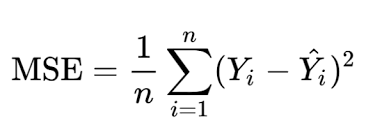

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y.values,infer)

4.151350633946037

**RAIZ QUADRADA DO ERRO-MÉDIO (REQE / RMSE)**

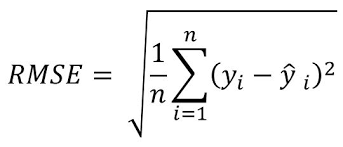

In [ ]:
mean_squared_error(y.values,infer,squared=False)

2.037486351842887

**ERRO MÉDIO ABSOLUTO (EMA / MAE)**

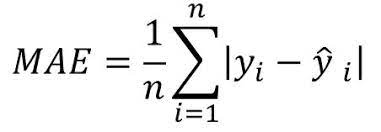

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y.values,infer)

1.6174822779397082

**Valores Esperados x Valores Reais**

Iremos apenas mostras visualmente a comparação entre 500 objetos do nosso conjunto de dados, entre o valor real (y) e o valor esperado (y^).

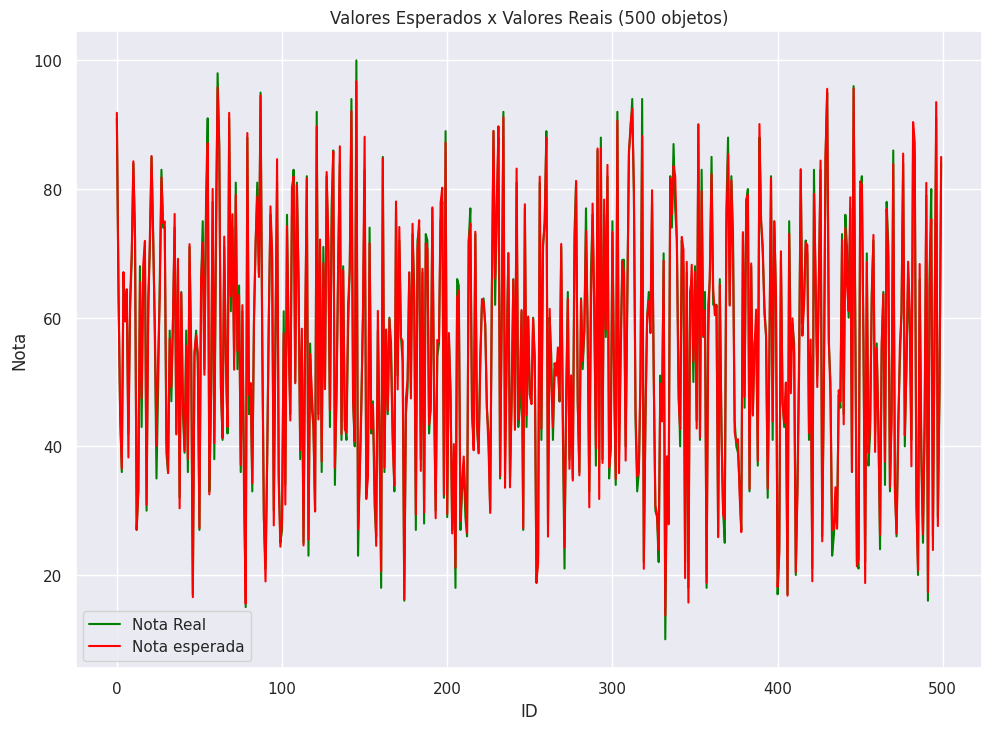

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.plot(y.values[:500],color='green',label='Nota Real')
plt.plot(infer[:500],color='red',label='Nota esperada')

plt.legend()

plt.title(f"Valores Esperados x Valores Reais (500 objetos)")
plt.ylabel("Nota")
plt.xlabel("ID")

plt.show()


### Comparação de resultados

Abaixo podemos verificar as diferentes retas geradas pelas tarefas:

In [ ]:
# Coeficientes da predição
lr.coef_

array([ 7.35037088, 17.6076092 ,  0.58605229,  0.80243736,  0.5685665 ])

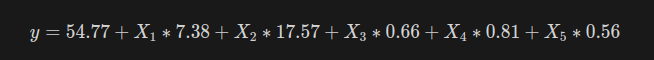

In [ ]:
# Coeficientes da inferência
regr.coef_

array([ 7.38688215, 17.66197609,  0.61289758,  0.81492275,  0.55567035])

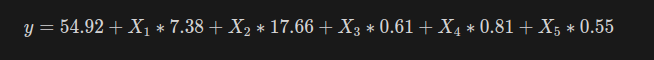

Esta diferença que houve em relação as retas de regressão se deu pelo fato de utilizarmos conjuntos de dados "diferentes" para estimar as retas. Na predição fizemos a divisão entre treino e teste e pra inferência isto não foi feito. Embora elas sejam diferentes, a diferença é quase imperceptível, e isto provavelmente ficaria mais notável caso aumentássemos o tamanho do conjunto de treino, que não é algo recomendado.

Finalmente, não é interessante comparar métricas entre estas duas tarefas, simplesmente pelo fato de terem objetivos diferentes.

Uma observação final é a de que, nem sempre para a predição precisamos realizar teste de hipótese, isto nem é tão utilizado nesta tarefa, pois verificar a validade dos coeficientes não é tão relevante quanto a capacidade de generalização do modelo, que é muito mais importante. Assim, pode existir um caso que os coeficientes do modelo todos não passem no teste de hipóteses, mas mesmo assim, todas as métricas estejam com muita qualidade.